Hello Brandon!

I’m happy to review your project today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>

Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

**Goal**

Build regression models, and compare their quality of prediction, speed of prediction, and time required to train. The best model will be used to predict the price of a car.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

from catboost import CatBoostRegressor, CatBoostClassifier
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

## Data preparation

In [2]:
df = pd.read_csv('/datasets/car_data.csv')

In [3]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [4]:
df.shape

(354369, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [6]:
df.isnull().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Mileage                  0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

NotRepaired, VehicleType, FuelType are the top 3 features with most missing value.

In [7]:
df.duplicated().sum()

262

In [8]:
df[df.duplicated()].head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
14266,21/03/2016 19:06,5999,small,2009,manual,80,polo,125000,5,petrol,volkswagen,no,21/03/2016 00:00,0,65529,05/04/2016 20:47
27568,23/03/2016 10:38,12200,bus,2011,manual,125,zafira,40000,10,gasoline,opel,no,23/03/2016 00:00,0,26629,05/04/2016 07:44
31599,03/04/2016 20:41,4950,wagon,2003,auto,170,e_klasse,150000,4,gasoline,mercedes_benz,no,03/04/2016 00:00,0,48432,05/04/2016 21:17
33138,07/03/2016 20:45,10900,convertible,2005,auto,163,clk,125000,5,petrol,mercedes_benz,no,07/03/2016 00:00,0,61200,21/03/2016 03:45
43656,13/03/2016 20:48,4200,sedan,2003,manual,105,golf,150000,10,gasoline,volkswagen,no,13/03/2016 00:00,0,14482,13/03/2016 20:48


In [9]:
df.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [10]:
#fic date format
df['DateCrawled'] = pd.to_datetime(df['DateCrawled'], format='%d/%m/%Y %H:%M')
df['DateCreated'] = pd.to_datetime(df['DateCreated'], format='%d/%m/%Y %H:%M')
df['LastSeen'] = pd.to_datetime(df['LastSeen'], format='%d/%m/%Y %H:%M')

In [11]:
df['DateCrawled'].min(), df['DateCrawled'].max()

(Timestamp('2016-03-05 14:06:00'), Timestamp('2016-04-07 14:36:00'))

In [12]:
df['DateCreated'].min(), df['DateCreated'].max() 

(Timestamp('2014-03-10 00:00:00'), Timestamp('2016-04-07 00:00:00'))

In [13]:
df['LastSeen'].min(), df['LastSeen'].max() 

(Timestamp('2016-03-05 14:15:00'), Timestamp('2016-04-07 14:58:00'))

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(354107, 16)

In [16]:
#Create a new feature
df['DaysOnSite'] = (df['LastSeen'] - df['DateCreated']).dt.days

In [17]:
np.any(df['DaysOnSite'] < 0)

False

In [18]:
df['CreateYear'] = df['DateCreated'].dt.year
df['CreateMonth'] = df['DateCreated'].dt.month
df['CreateDay'] = df['DateCreated'].dt.day

In [19]:
def category_distribution(df, field):
   
    print(f'Distribution for {field}')
    print(df[field].value_counts(normalize=True, dropna=False))
    print()

In [20]:
cat_cols = ['NotRepaired', 'VehicleType', 'FuelType', 'Gearbox', 'Model']
for col in cat_cols:
    category_distribution(df, col)

Distribution for NotRepaired
no     0.697323
NaN    0.200914
yes    0.101763
Name: NotRepaired, dtype: float64

Distribution for VehicleType
sedan          0.258111
small          0.225223
wagon          0.183885
NaN            0.105855
bus            0.081196
convertible    0.056988
coupe          0.045599
suv            0.033863
other          0.009280
Name: VehicleType, dtype: float64

Distribution for FuelType
petrol      0.610440
gasoline    0.278611
NaN         0.092879
lpg         0.014987
cng         0.001596
hybrid      0.000658
other       0.000576
electric    0.000254
Name: FuelType, dtype: float64

Distribution for Gearbox
manual    0.756929
auto      0.187071
NaN       0.056000
Name: Gearbox, dtype: float64

Distribution for Model
golf                  0.082503
other                 0.068911
3er                   0.055757
NaN                   0.055636
polo                  0.036873
                        ...   
serie_2               0.000023
rangerover            0.00001

In [21]:
#Populate features with missing values
def populate_missing_categories(df, field):
    
    np.random.seed(42)
    a = df[field].value_counts().index
    p = df[field].value_counts(normalize=True).values
    size = df[field].isnull().sum()
    values = np.random.choice(a, p=p, size=size)
    return values

In [22]:
bin_cols = ['NotRepaired', 'Gearbox']
for col in bin_cols:
    print(f'Populate missing values for {col}')
    df.loc[df[col].isnull(), col] = populate_missing_categories(df, col)

Populate missing values for NotRepaired
Populate missing values for Gearbox


In [23]:
def build_model_to_populate_missing_feats(model, df, target, 
                hyperparameters={}, 
                scoring=None,
                cv=2, frac=0.4, drop_feats=[], cat_features=[], verbose=False):
   
    np.random.seed(42)
    start_time = time.time()
    data = df.copy(deep=True)
    data.drop(drop_feats, axis=1, inplace=True)
    data[cat_features] = data[cat_features].replace(np.nan, 'nan')
    oe = OrdinalEncoder()
    data[cat_features] = oe.fit_transform(data[cat_features]).astype(np.uint16)
    x_train, y_train = (
                        data[data[target].notnull()].drop([target], axis=1).sample(frac=frac, random_state=42),
                        data[data[target].notnull()][target].sample(frac=frac, random_state=42)
    )
    x_test = data[data[target].isnull()].drop([target], axis=1)
    print(f'Shape of train set is {x_train.shape} and test set is {x_test.shape}')
    del data
    gs = GridSearchCV(model, param_grid=hyperparameters, cv=cv, scoring=scoring)
    gs.fit(x_train, y_train)
    
    gs.best_estimator_.fit(x_train, y_train, cat_features=cat_features, verbose=verbose)
    preds = gs.best_estimator_.predict(x_test)
    df.loc[df[target].isnull(), target] = preds
    end_time = time.time() - start_time
    del x_train, x_test, y_train
    print(f'Time taken to complete predictions for {target} is {end_time} seconds')

In [24]:
drop_feats = ['DateCrawled', 'DateCreated', 'LastSeen']
cat_spl_features = ['Gearbox', 'Brand',
               'Model', 'FuelType', 'NotRepaired', 'CreateYear', 'CreateMonth', 
               'CreateDay', 'PostalCode']
cat_classifier = CatBoostClassifier(
                        learning_rate=0.9, 
                        loss_function='MultiClass',
                        early_stopping_rounds=5,
                        depth=9,
                        eval_metric='TotalF1',
                        random_seed=42)
target = 'VehicleType'
build_model_to_populate_missing_feats(cat_classifier, 
                                      df, target, 
                                      hyperparameters={'iterations': [10]}, 
                                      scoring='f1_weighted', 
                                      cv=2,
                                      drop_feats=drop_feats,
                                      cat_features=cat_spl_features
                                     )

Shape of train set is (126649, 16) and test set is (37484, 16)
0:	learn: 0.5013392	total: 483ms	remaining: 4.35s
1:	learn: 0.5118647	total: 926ms	remaining: 3.7s
2:	learn: 0.5475524	total: 1.38s	remaining: 3.22s
3:	learn: 0.5622483	total: 1.83s	remaining: 2.75s
4:	learn: 0.5851799	total: 2.26s	remaining: 2.26s
5:	learn: 0.5930351	total: 2.7s	remaining: 1.8s
6:	learn: 0.6072650	total: 3.13s	remaining: 1.34s
7:	learn: 0.6143922	total: 3.57s	remaining: 894ms
8:	learn: 0.6193716	total: 4.02s	remaining: 446ms
9:	learn: 0.6347588	total: 4.45s	remaining: 0us
0:	learn: 0.4847991	total: 443ms	remaining: 3.99s
1:	learn: 0.4828675	total: 892ms	remaining: 3.57s
2:	learn: 0.5021788	total: 1.33s	remaining: 3.1s
3:	learn: 0.5298910	total: 1.77s	remaining: 2.66s
4:	learn: 0.5537250	total: 2.22s	remaining: 2.22s
5:	learn: 0.5690349	total: 2.65s	remaining: 1.77s
6:	learn: 0.5794924	total: 3.1s	remaining: 1.33s
7:	learn: 0.5960566	total: 3.55s	remaining: 888ms
8:	learn: 0.6054058	total: 4s	remaining: 444

In [25]:
# check if feature is populated
df['VehicleType'].isnull().sum()

0

In [26]:
drop_feats = ['DateCrawled', 'DateCreated', 'LastSeen']
cat_spl_features = ['VehicleType', 'Gearbox', 'Brand',
               'Model', 'NotRepaired', 'CreateYear', 'CreateMonth', 
               'CreateDay', 'PostalCode']
cat_classifier = CatBoostClassifier(
                        learning_rate=0.9, 
                        loss_function='MultiClass',
                        early_stopping_rounds=5,
                        depth=9,
                        eval_metric='TotalF1',
                        random_seed=42)
target = 'FuelType'
build_model_to_populate_missing_feats(cat_classifier, 
                                      df, target, 
                                      hyperparameters={'iterations': [10]}, 
                                      scoring='f1_weighted', 
                                      cv=2,
                                      frac=0.2,
                                      drop_feats=drop_feats,
                                      cat_features=cat_spl_features
                                     )

Shape of train set is (64244, 16) and test set is (32889, 16)
0:	learn: 0.7769840	total: 233ms	remaining: 2.1s
1:	learn: 0.6445170	total: 457ms	remaining: 1.83s
2:	learn: 0.7785125	total: 668ms	remaining: 1.56s
3:	learn: 0.7943183	total: 891ms	remaining: 1.34s
4:	learn: 0.7993908	total: 1.12s	remaining: 1.12s
5:	learn: 0.8074207	total: 1.36s	remaining: 904ms
6:	learn: 0.8106732	total: 1.58s	remaining: 678ms
7:	learn: 0.8143898	total: 1.81s	remaining: 454ms
8:	learn: 0.8144923	total: 2.05s	remaining: 228ms
9:	learn: 0.8199119	total: 2.27s	remaining: 0us
0:	learn: 0.7547213	total: 204ms	remaining: 1.83s
1:	learn: 0.6717463	total: 424ms	remaining: 1.7s
2:	learn: 0.7704387	total: 647ms	remaining: 1.51s
3:	learn: 0.7851970	total: 865ms	remaining: 1.3s
4:	learn: 0.7923822	total: 1.09s	remaining: 1.09s
5:	learn: 0.7916910	total: 1.33s	remaining: 886ms
6:	learn: 0.8022412	total: 1.55s	remaining: 664ms
7:	learn: 0.8050131	total: 1.78s	remaining: 445ms
8:	learn: 0.8113005	total: 2s	remaining: 22

In [27]:
# check if feature is populated
df['FuelType'].isnull().sum()

0

In [28]:
# check distribution of categorical features
for col in cat_cols:
    category_distribution(df, col)

Distribution for NotRepaired
no     0.872892
yes    0.127108
Name: NotRepaired, dtype: float64

Distribution for VehicleType
sedan          0.295462
small          0.261746
wagon          0.198539
bus            0.091518
convertible    0.059200
coupe          0.047810
suv            0.035498
other          0.010229
Name: VehicleType, dtype: float64

Distribution for FuelType
petrol      0.684090
gasoline    0.297755
lpg         0.015024
cng         0.001615
hybrid      0.000683
other       0.000576
electric    0.000257
Name: FuelType, dtype: float64

Distribution for Gearbox
manual    0.801831
auto      0.198169
Name: Gearbox, dtype: float64

Distribution for Model
golf                  0.082503
other                 0.068911
3er                   0.055757
NaN                   0.055636
polo                  0.036873
                        ...   
serie_2               0.000023
rangerover            0.000011
serie_3               0.000011
serie_1               0.000006
range_rover_evoq

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

You used very interesting ways of filling in the NaNs. Good job! But have you tried filling in NaNs in categorical features using a placeholder, for example, using the string "unknown"? My experience shows that in the vast majority of cases, this simple method of filling in the NaNs works better than the most advanced methods.

</div>

In [29]:
df.duplicated().sum()

32

In [30]:
df.drop_duplicates(inplace=True)

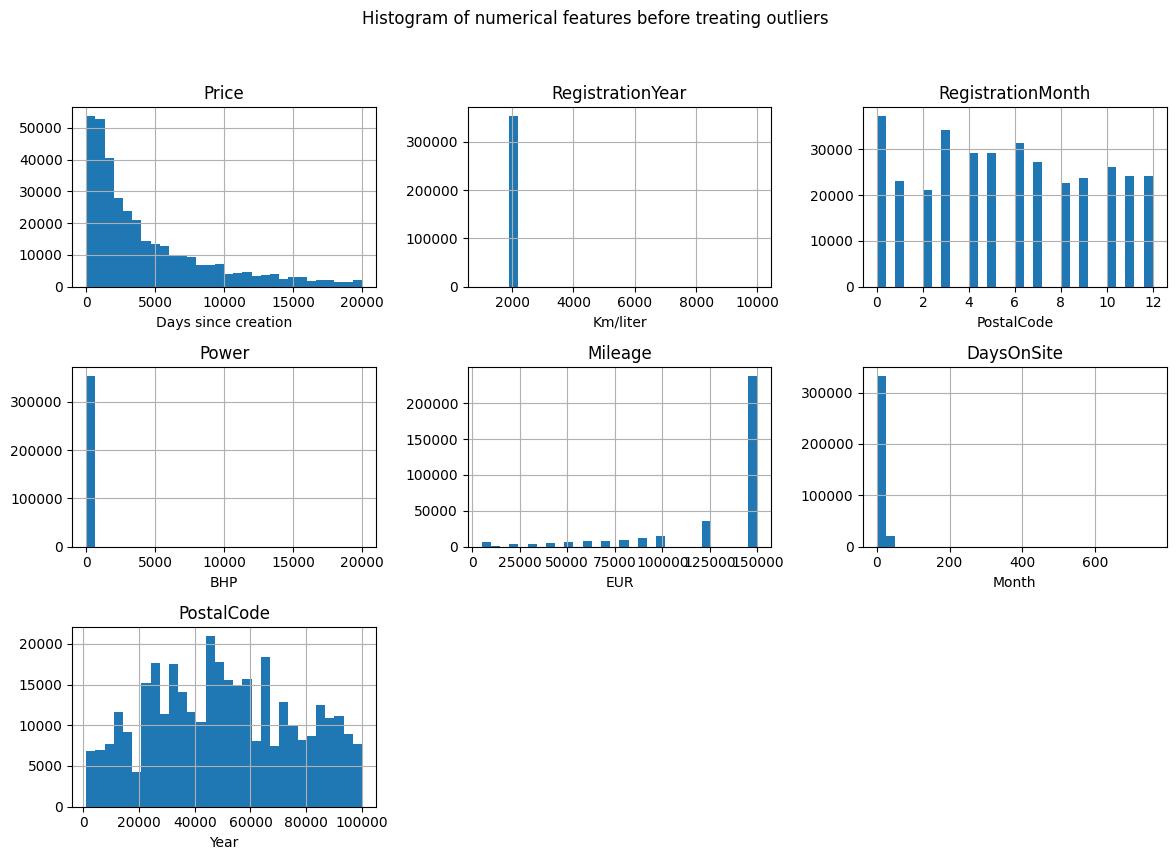

In [31]:
hist_cols = ['Price', 'RegistrationYear', 'RegistrationMonth', 'Power', 'Mileage',
            'DaysOnSite', 'PostalCode']
xlabels = [['Days since creation', 'Km/liter', 'PostalCode'], 
          ['BHP', 'EUR', 'Month'],
          ['Year']]
fig, ax = plt.subplots(figsize=(12, 9))
axes = df[hist_cols].hist(bins=30, ax=ax)
for i in range(len(axes)):
    for j in range(len(axes)):
        if i == 2 and j > 0: continue
        axes[i][j].set_xlabel(xlabels[i][j])
plt.suptitle('Histogram of numerical features before treating outliers')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The Price is right-skewed; there are observations with very low priced cars, which is abnormal.

Majority of the RegistrationYear is year 2000. However, we know that there are outliers here; the same applies to Power.

In [32]:
# check for outliers
def identify_outliers(df, field):
    
    Q1 = df[field].quantile(.25)
    Q3 = df[field].quantile(.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR
    return lb, ub

In [33]:
df[df['Price'] < 50].shape

(12420, 20)

In [34]:
df[df['Price'] < 50].shape[0] / df.shape[0]

0.03507731412836264

In [35]:
df[df['Price'] < 50].describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode,DaysOnSite,CreateYear,CreateMonth,CreateDay
count,12420.000000,12420.000000,12420.000000,12420.000000,12420.000000,12420.0,12420.000000,12420.000000,12420.0,12420.000000,12420.000000
mean,0.893156,2008.495572,79.470773,121469.404187,3.600483,0.0,45399.282448,7.517955,2016.0,3.156441,16.045813
std,4.753588,262.170104,227.383905,50988.365939,4.022439,0.0,26368.614495,8.117499,0.0,0.365057,9.117634
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1069.000000,0.000000,2016.0,1.000000,1.000000
25%,0.000000,1996.000000,0.000000,125000.000000,0.000000,0.0,25746.000000,1.000000,2016.0,3.000000,8.000000
50%,0.000000,2000.000000,73.000000,150000.000000,2.000000,0.0,44269.000000,4.000000,2016.0,3.000000,16.000000
75%,0.000000,2005.000000,118.000000,150000.000000,7.000000,0.0,64319.000000,11.000000,2016.0,3.000000,24.000000
max,49.000000,9999.000000,15016.000000,150000.000000,12.000000,0.0,99996.000000,59.000000,2016.0,4.000000,31.000000


In [36]:
df[(df['Power'] < 100) | (df['Power'] > 2000)].shape

(154280, 20)

In [37]:
df[(df['Power'] < 100) | (df['Power'] > 2000)].shape[0] / df.shape[0]

0.4357268940196286

In [38]:
df[(df['Power'] < 100) | (df['Power'] > 2000)].describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode,DaysOnSite,CreateYear,CreateMonth,CreateDay
count,154280.000000,154280.000000,154280.000000,154280.000000,154280.000000,154280.0,154280.000000,154280.000000,154280.000000,154280.000000,154280.000000
mean,2422.968415,2004.529103,58.571279,123508.231786,5.288631,0.0,48588.350726,8.151160,2015.999916,3.157953,15.907182
std,2786.386940,132.792299,269.795781,41604.935298,3.857717,0.0,25378.206605,8.585675,0.009860,0.372680,9.100873
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000,0.000000,2014.000000,1.000000,1.000000
25%,650.000000,1998.000000,0.000000,100000.000000,2.000000,0.0,27749.000000,2.000000,2016.000000,3.000000,8.000000
50%,1400.000000,2001.000000,60.000000,150000.000000,5.000000,0.0,47259.000000,5.000000,2016.000000,3.000000,16.000000
75%,3150.000000,2007.000000,75.000000,150000.000000,9.000000,0.0,66687.000000,12.000000,2016.000000,3.000000,24.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000,759.000000,2016.000000,12.000000,31.000000


In [39]:
df[(df['RegistrationYear'] < 1900) | (df['RegistrationYear'] > 2021)].shape

(171, 20)

In [40]:
df[(df['RegistrationYear'] < 1900) | (df['RegistrationYear'] > 2021)].shape[0] / df.shape[0]

0.0004829485278542682

In [41]:
df[(df['RegistrationMonth'] == 0) ].shape

(37346, 20)

In [42]:
df[(df['RegistrationMonth'] == 0) ].shape[0] / df.shape[0]

0.10547482877921345

Power has almost 44% of the observations where the value is either below 100 HP or above 2000 HP. So, we cannot just remove these records. So, the next best alternative is to replace these extremes with the median.

In [43]:
df['Power'].median(), df['Power'].mean()

(105.0, 110.0883230953894)

In [44]:
#replace the extreme values with median
mask = (df['Power'] < 100) | (df['Power'] > 2000)
df.loc[mask, 'Power'] = df['Power'].median()

In [45]:
df['RegistrationYear'].median(), df['RegistrationYear'].mean()

(2003.0, 2004.2355687354375)

In [46]:
#replace the extreme values with median
mask = (df['RegistrationYear'] < 1900) | (df['RegistrationYear'] > 2021)
df.loc[mask, 'RegistrationYear'] = df['RegistrationYear'].median()

In [47]:
df['RegistrationMonth'].median(), df['RegistrationMonth'].mean()

(6.0, 5.7140888229894795)

In [48]:
# Simplify features so that model dont have too many features to predict
df['Model'] = (df.groupby(['Brand', 'RegistrationYear'])['Model'].transform(lambda x: x.fillna((x.mode() if np.all(x.mode()) == True else 'other'))))

In [49]:
# check if Model has missing values
df['Model'].isnull().sum()

3410

In [50]:
df['Model'].fillna('other', inplace=True)

In [51]:
df['Model'].isnull().sum()

0

In [52]:
#replace the extreme values with median
mask = (df['RegistrationMonth'] == 0)
df.loc[mask, 'RegistrationMonth'] = df['RegistrationMonth'].median()

In [53]:
# check for duplicates post fixing outliers
df.duplicated().sum()

14

In [54]:
# remove duplicates from outlier fixing
df.drop_duplicates(inplace=True)

In [55]:
# remove Price below EUR 50
new_df = df[df['Price'] >= 50].copy()

In [56]:
new_df.shape

(341641, 20)

In [57]:
new_df.duplicated().sum()

0

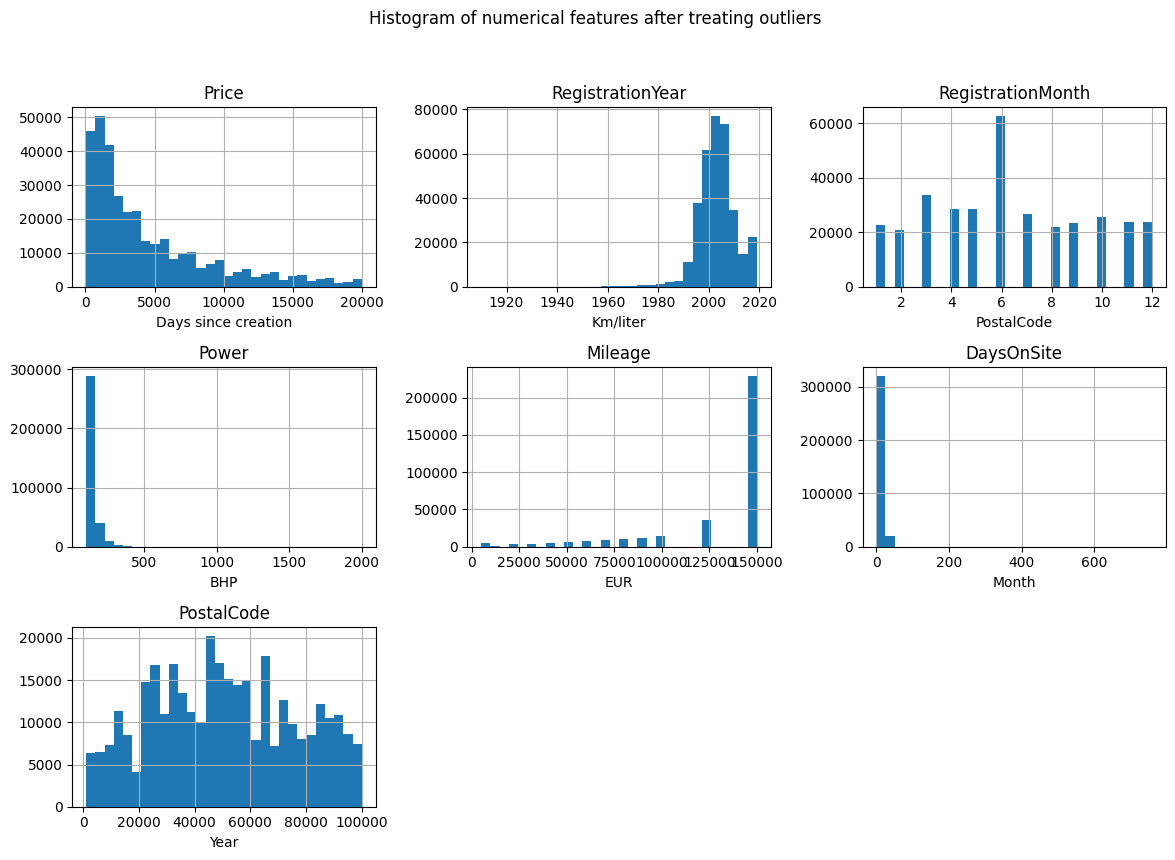

In [58]:
# plot the numerical features post fixing outliers
fig, ax = plt.subplots(figsize=(12, 9))
axes = new_df[hist_cols].hist(bins=30, ax=ax)
for i in range(len(axes)):
    for j in range(len(axes)):
        if i == 2 and j > 0: continue
        axes[i][j].set_xlabel(xlabels[i][j])
plt.suptitle('Histogram of numerical features after treating outliers')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Post cleanup of the outliers, the distributions for Power, RegistrationYear, RegistrationMonth have improved.

In [59]:
encode_cols = ['PostalCode']
encode_cols += new_df.select_dtypes(include=['object']).columns.tolist()
oe = OrdinalEncoder()
new_df[encode_cols] = oe.fit_transform(new_df[encode_cols])

In [60]:
new_df.duplicated().sum()

0

In [61]:
drop_cols = ['DateCrawled', 'DateCreated', 'NumberOfPictures', 'LastSeen']
new_df.drop(drop_cols, axis=1, inplace=True)

In [62]:
new_df.shape

(341641, 16)

In [63]:
new_df.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,PostalCode,DaysOnSite,CreateYear,CreateMonth,CreateDay
0,480,5.0,1993.0,1.0,105.0,116.0,150000,6.0,6.0,38.0,0.0,4896.0,14,2016,3,24
1,18300,2.0,2011.0,1.0,190.0,166.0,125000,5.0,2.0,1.0,1.0,4613.0,14,2016,3,24
2,9800,6.0,2004.0,0.0,163.0,117.0,125000,8.0,2.0,14.0,1.0,6989.0,22,2016,3,14
3,1500,5.0,2001.0,1.0,105.0,116.0,150000,6.0,6.0,38.0,0.0,7029.0,0,2016,3,17
4,3600,5.0,2008.0,1.0,105.0,101.0,90000,7.0,2.0,31.0,0.0,4210.0,6,2016,3,31


In [64]:
# check for missing
new_df.isnull()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,PostalCode,DaysOnSite,CreateYear,CreateMonth,CreateDay
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354363,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
354365,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
354366,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
354367,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [65]:
# check for duplicates
new_df.duplicated().sum()

7973

In [66]:
new_df.drop_duplicates(inplace=True)

In [67]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333668 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Price              333668 non-null  int64  
 1   VehicleType        333668 non-null  float64
 2   RegistrationYear   333668 non-null  float64
 3   Gearbox            333668 non-null  float64
 4   Power              333668 non-null  float64
 5   Model              333668 non-null  float64
 6   Mileage            333668 non-null  int64  
 7   RegistrationMonth  333668 non-null  float64
 8   FuelType           333668 non-null  float64
 9   Brand              333668 non-null  float64
 10  NotRepaired        333668 non-null  float64
 11  PostalCode         333668 non-null  float64
 12  DaysOnSite         333668 non-null  int64  
 13  CreateYear         333668 non-null  int64  
 14  CreateMonth        333668 non-null  int64  
 15  CreateDay          333668 non-null  int64  
dtypes:

In [68]:
def convert_dtype(df, field, dtype=np.uint8):
    try:
        df[field] = df[field].astype(dtype)
    except:
        print(f'Failed to change dtype for {field}')

In [69]:
dtype_cols = {
    'VehicleType': int,
    'RegistrationYear': int,
    'Gearbox': int,
    'Power': int,
    'Model': int,
    'RegistrationMonth': int,
    'FuelType': int,
    'Brand': int,
    'NotRepaired': int,
    'PostalCode': int,
    'DaysOnSite': int,
    'CreateYear': int,
    'CreateMonth': int,
    'CreateDay': int
}

In [70]:
for col in dtype_cols:
    print(f'Conversion for {col}')
    convert_dtype(new_df, col, dtype_cols[col])

Conversion for VehicleType
Conversion for RegistrationYear
Conversion for Gearbox
Conversion for Power
Conversion for Model
Conversion for RegistrationMonth
Conversion for FuelType
Conversion for Brand
Conversion for NotRepaired
Conversion for PostalCode
Conversion for DaysOnSite
Conversion for CreateYear
Conversion for CreateMonth
Conversion for CreateDay


In [71]:
# check dtypes
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333668 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Price              333668 non-null  int64
 1   VehicleType        333668 non-null  int64
 2   RegistrationYear   333668 non-null  int64
 3   Gearbox            333668 non-null  int64
 4   Power              333668 non-null  int64
 5   Model              333668 non-null  int64
 6   Mileage            333668 non-null  int64
 7   RegistrationMonth  333668 non-null  int64
 8   FuelType           333668 non-null  int64
 9   Brand              333668 non-null  int64
 10  NotRepaired        333668 non-null  int64
 11  PostalCode         333668 non-null  int64
 12  DaysOnSite         333668 non-null  int64
 13  CreateYear         333668 non-null  int64
 14  CreateMonth        333668 non-null  int64
 15  CreateDay          333668 non-null  int64
dtypes: int64(16)
memory usage: 43.3 MB


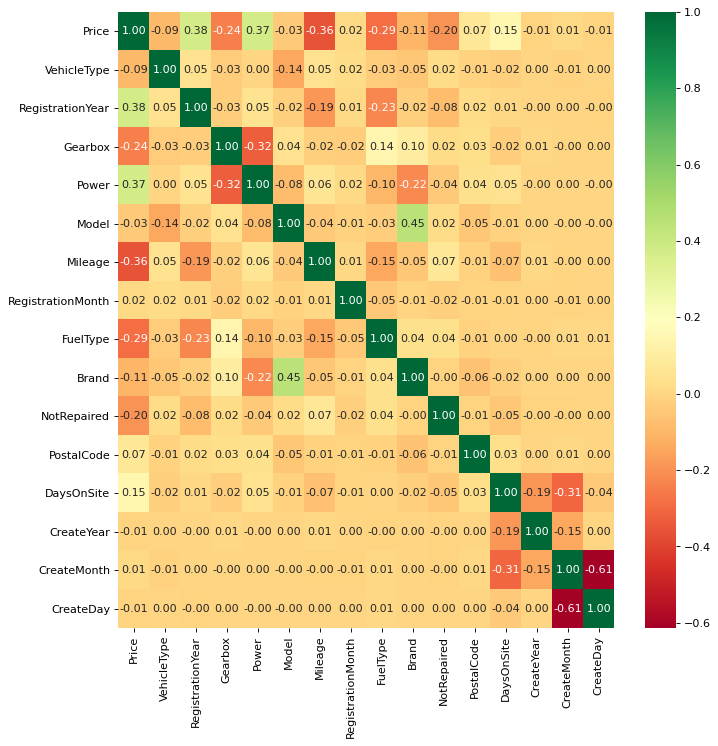

In [72]:
# Correlation heatmap
plt.figure(figsize=(10, 10), dpi=80)
sns.heatmap(new_df.corr(), annot=True, cmap="RdYlGn", fmt=".2f")
plt.show()

Ignoring the categorical features, we can see that RegistrationYear has a moderately strong positive correlation with Price.

Similarly, Power a moderately strong positive correlation with Price.

As expected, Mileage is negatively correlated with Price.

Among the categorical features, Brand and Model have a positive correlation.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great job! Your EDA and data preprocessing parts are really impressive. It's hard to think of what else could be done in these parts:)

</div>

## Model training

In [73]:
x_train, x_test, y_train, y_test = train_test_split(new_df.drop(['Price'], axis=1), new_df['Price'], test_size=0.2, random_state=42)


In [74]:
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.1, random_state=42)

In [75]:
x_train.shape, x_valid.shape, x_test.shape, y_train.shape, y_valid.shape, y_test.shape

((266934, 15), (60060, 15), (6674, 15), (266934,), (60060,), (6674,))

In [76]:
def rmse(y_true, y_pred):
    
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [77]:
def build_model(model, x_train, y_train, x_valid, y_valid, hyperparameters={}, scoring=None, cv=5, model_str=None, cat_features=[], verbose=False):
    np.random.seed(42)
    best_rmse = 0
    
    gs = GridSearchCV(model, param_grid=hyperparameters, cv=cv, scoring=scoring)
    gs.fit(x_train, y_train)
    
    start_time = time.time()
    if model_str == 'catboost':
        gs.best_estimator_.fit(x_train, y_train, cat_features=cat_features, verbose=verbose)
    else:
        gs.best_estimator_.fit(x_train, y_train)
    end_time = time.time() - start_time
    
    preds = gs.best_estimator_.predict(x_valid)
    best_rmse = rmse(y_valid, preds)
    
    return gs.best_estimator_, best_rmse, np.round(end_time, 2)

In [78]:
lr = LinearRegression()
best_lr_model, best_lr_rmse, best_lr_time = build_model(
                                                        lr, 
                                                        x_train, 
                                                        y_train, 
                                                        x_valid, 
                                                        y_valid,
                                                        hyperparameters={}, 
                                                        scoring=make_scorer(rmse), 
                                                        cv=5, 
                                                        model_str='lr'
                                                       )

In [79]:
rf = RandomForestRegressor(random_state=42)
best_rf_model, best_rf_rmse, best_rf_time = build_model(
                                                        rf, 
                                                        x_train, 
                                                        y_train, 
                                                        x_valid, 
                                                        y_valid,
                                                        hyperparameters={'n_estimators': [20, 30, 40, 50]}, 
                                                        scoring=make_scorer(rmse), 
                                                        cv=5
                                                       )

In [80]:
cat_features = ['VehicleType',  'Gearbox', 'Brand', 'Model', 'FuelType', 'NotRepaired', 'CreateYear', 'CreateMonth', 'CreateDay', 'PostalCode']

cat = CatBoostRegressor(learning_rate=0.9, loss_function='RMSE', random_seed=42)
best_cb_model, best_cb_rmse, best_cb_time = build_model(
                                                        cat, 
                                                        x_train, 
                                                        y_train, 
                                                        x_valid, 
                                                        y_valid,
                                                        hyperparameters={'iterations': [20, 30, 40, 50]}, 
                                                        scoring=make_scorer(rmse), 
                                                        cv=5, 
                                                        model_str='catboost',
                                                        cat_features=cat_features
                                                       )

0:	learn: 2712.6775897	total: 51.4ms	remaining: 976ms
1:	learn: 2424.4799816	total: 97.7ms	remaining: 879ms
2:	learn: 2293.0619626	total: 149ms	remaining: 845ms
3:	learn: 2198.3407052	total: 209ms	remaining: 836ms
4:	learn: 2151.3555511	total: 251ms	remaining: 754ms
5:	learn: 2111.8252403	total: 298ms	remaining: 695ms
6:	learn: 2065.2593260	total: 344ms	remaining: 639ms
7:	learn: 2043.4961256	total: 390ms	remaining: 586ms
8:	learn: 2027.8983911	total: 434ms	remaining: 531ms
9:	learn: 1989.3859648	total: 488ms	remaining: 488ms
10:	learn: 1963.7320117	total: 551ms	remaining: 451ms
11:	learn: 1949.3842847	total: 607ms	remaining: 404ms
12:	learn: 1934.8888243	total: 653ms	remaining: 351ms
13:	learn: 1923.8483236	total: 703ms	remaining: 301ms
14:	learn: 1912.4658828	total: 749ms	remaining: 250ms
15:	learn: 1900.8957819	total: 805ms	remaining: 201ms
16:	learn: 1894.7775624	total: 851ms	remaining: 150ms
17:	learn: 1885.2835213	total: 904ms	remaining: 100ms
18:	learn: 1875.4324552	total: 950ms

24:	learn: 1841.0564893	total: 1.37s	remaining: 273ms
25:	learn: 1835.8906723	total: 1.42s	remaining: 218ms
26:	learn: 1826.3388808	total: 1.48s	remaining: 164ms
27:	learn: 1822.0712559	total: 1.53s	remaining: 109ms
28:	learn: 1817.6922591	total: 1.58s	remaining: 54.5ms
29:	learn: 1813.5163698	total: 1.64s	remaining: 0us
0:	learn: 2711.6974623	total: 61.7ms	remaining: 1.79s
1:	learn: 2437.4379721	total: 118ms	remaining: 1.65s
2:	learn: 2323.3973966	total: 178ms	remaining: 1.6s
3:	learn: 2237.0494833	total: 249ms	remaining: 1.62s
4:	learn: 2161.8735303	total: 310ms	remaining: 1.55s
5:	learn: 2124.3003015	total: 364ms	remaining: 1.46s
6:	learn: 2096.1889155	total: 412ms	remaining: 1.35s
7:	learn: 2052.2990765	total: 468ms	remaining: 1.29s
8:	learn: 2015.1175579	total: 527ms	remaining: 1.23s
9:	learn: 1996.3204829	total: 586ms	remaining: 1.17s
10:	learn: 1975.1511123	total: 635ms	remaining: 1.1s
11:	learn: 1963.1578358	total: 690ms	remaining: 1.03s
12:	learn: 1949.7078515	total: 748ms	rem

20:	learn: 1862.9290987	total: 1.16s	remaining: 1.05s
21:	learn: 1859.2619131	total: 1.23s	remaining: 1.01s
22:	learn: 1849.7504792	total: 1.29s	remaining: 951ms
23:	learn: 1845.9690282	total: 1.34s	remaining: 891ms
24:	learn: 1841.0564893	total: 1.39s	remaining: 832ms
25:	learn: 1835.8906723	total: 1.44s	remaining: 774ms
26:	learn: 1826.3388808	total: 1.49s	remaining: 718ms
27:	learn: 1822.0712559	total: 1.54s	remaining: 661ms
28:	learn: 1817.6922591	total: 1.59s	remaining: 605ms
29:	learn: 1813.5163698	total: 1.65s	remaining: 550ms
30:	learn: 1807.2793160	total: 1.71s	remaining: 496ms
31:	learn: 1802.3701989	total: 1.76s	remaining: 441ms
32:	learn: 1799.1701011	total: 1.81s	remaining: 385ms
33:	learn: 1792.8725445	total: 1.87s	remaining: 331ms
34:	learn: 1788.7092411	total: 1.94s	remaining: 277ms
35:	learn: 1786.1468708	total: 1.99s	remaining: 221ms
36:	learn: 1782.5580854	total: 2.04s	remaining: 165ms
37:	learn: 1778.1805845	total: 2.09s	remaining: 110ms
38:	learn: 1774.9240803	tota

13:	learn: 1923.8483236	total: 738ms	remaining: 1.9s
14:	learn: 1912.4658828	total: 788ms	remaining: 1.84s
15:	learn: 1900.8957819	total: 843ms	remaining: 1.79s
16:	learn: 1894.7775624	total: 891ms	remaining: 1.73s
17:	learn: 1885.2835213	total: 947ms	remaining: 1.68s
18:	learn: 1875.4324552	total: 995ms	remaining: 1.62s
19:	learn: 1869.3737390	total: 1.04s	remaining: 1.57s
20:	learn: 1860.2623802	total: 1.1s	remaining: 1.52s
21:	learn: 1855.2957153	total: 1.15s	remaining: 1.46s
22:	learn: 1850.3164395	total: 1.2s	remaining: 1.41s
23:	learn: 1842.1039228	total: 1.25s	remaining: 1.36s
24:	learn: 1833.7758766	total: 1.3s	remaining: 1.3s
25:	learn: 1828.5732439	total: 1.35s	remaining: 1.25s
26:	learn: 1823.7890964	total: 1.4s	remaining: 1.19s
27:	learn: 1819.7116608	total: 1.46s	remaining: 1.15s
28:	learn: 1811.6423424	total: 1.52s	remaining: 1.1s
29:	learn: 1806.6352380	total: 1.57s	remaining: 1.05s
30:	learn: 1802.9725673	total: 1.63s	remaining: 997ms
31:	learn: 1800.4652752	total: 1.69

16:	learn: 1894.8810337	total: 990ms	remaining: 1.92s
17:	learn: 1888.4144307	total: 1.04s	remaining: 1.85s
18:	learn: 1881.1613763	total: 1.09s	remaining: 1.78s
19:	learn: 1870.8763753	total: 1.15s	remaining: 1.72s
20:	learn: 1863.3545453	total: 1.2s	remaining: 1.65s
21:	learn: 1857.3990321	total: 1.24s	remaining: 1.58s
22:	learn: 1849.7878109	total: 1.3s	remaining: 1.53s
23:	learn: 1845.4098782	total: 1.35s	remaining: 1.46s
24:	learn: 1838.7646607	total: 1.41s	remaining: 1.41s
25:	learn: 1834.2958139	total: 1.46s	remaining: 1.35s
26:	learn: 1827.3711282	total: 1.53s	remaining: 1.3s
27:	learn: 1820.6753745	total: 1.58s	remaining: 1.24s
28:	learn: 1816.6274168	total: 1.63s	remaining: 1.18s
29:	learn: 1810.3267866	total: 1.69s	remaining: 1.13s
30:	learn: 1807.2245706	total: 1.74s	remaining: 1.06s
31:	learn: 1801.8928124	total: 1.78s	remaining: 1s
32:	learn: 1798.6280286	total: 1.84s	remaining: 948ms
33:	learn: 1792.3559101	total: 1.91s	remaining: 899ms
34:	learn: 1787.2183176	total: 1.9

In [81]:
model_results_df = pd.DataFrame({
                                    'model': ['LinearRegression', 'RandomForestRegressor', 'CatBoostRegressor'],
                                    'best_rmse': [best_lr_rmse, best_rf_rmse, best_cb_rmse],
                                    'train_time': [best_lr_time, best_rf_time, best_cb_time]
                                })

In [82]:
model_results_df

,model,best_rmse,train_time
0,LinearRegression,3270.719292,0.34
1,RandomForestRegressor,1696.334771,48.95
2,CatBoostRegressor,1850.415514,7.52


In [83]:
# best features from rf model
pd.DataFrame(best_rf_model.feature_importances_, index=new_df.columns[1:].tolist()).sort_values(0, ascending=False)

,0
RegistrationYear,0.470718
Power,0.253750
Mileage,0.051979
Brand,0.040811
VehicleType,0.035100
Model,0.032832
PostalCode,0.029839
DaysOnSite,0.024251
CreateDay,0.018200
RegistrationMonth,0.016879


In [84]:
# best features from cb model
pd.DataFrame(best_cb_model.feature_importances_, index=new_df.columns[1:].tolist()).sort_values(0, ascending=False)

,0
RegistrationYear,49.226678
Power,27.215298
Mileage,6.379482
Brand,5.553353
VehicleType,4.373798
Model,2.877535
NotRepaired,1.464062
DaysOnSite,1.227861
FuelType,1.117343
Gearbox,0.265626


The RandomForestRegressor and CatBoostRegressor were trained using GridSearch with a CrossValidation of 5 folds. For the sake of time, only 1 hyperparameter was tuned - n_estimators/iterations

The RandomForestRegressor has the worst performance with respect to training time; it has taken 48.95 seconds. Whereas, LinearRegression took the least amount of time - 0.34 seconds. However, on the validation set, RandomForestRegressor has the best RMSE of EUR 1696

The top 3 important features from RandomForest and CatBoost are: RegistrationYear, Power, and Mileage.

The consistency in the top features indicates that these features are truly significant in explaining the variance in the target variable (Price). This means that regardless of the specific algorithm, these features have a strong predictive power.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Everything is correct except training time calculation. You calculated not training time but: training time + hyperparameter tuning time + prediction time. But you need to calculate only train time for the best_estimator_

</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

code updated
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Well done!

</div>

## Model analysis

In [85]:
def test_prediction(model, test_X, test_y):
    start_time = time.time()
    preds = model.predict(test_X)
    prediction_time = time.time() - start_time
    
    return np.round(prediction_time, 2), rmse(test_y, preds)

In [86]:
models = [best_lr_model, best_rf_model, best_cb_model]

for model in models:
    pred_time, best_rmse = test_prediction(model, x_test, y_test)
    print(f'The RMSE on the test set is {best_rmse}, and time to predict {pred_time} seconds')

The RMSE on the test set is 3194.3149745175806, and time to predict 0.01 seconds
The RMSE on the test set is 1642.407858318605, and time to predict 0.22 seconds
The RMSE on the test set is 1753.2470372478872, and time to predict 0.03 seconds


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Negative time? This is weird:) I think you need to round the time after subtraction and not before

</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Thank you, I actually did not notice that. code updated.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Thank you:)

</div>

The results of testing the best models on the test set reveal that RandomForestRegressor has the best RMSE - 1642; However, the predictions took 220 milliseconds.

While CatBoostRegressor has a slightly higher RMSE - 1753;But predictions took 30 milliseconds.

# Summary

RustyBargain will have to make a compromise between a 7x increase in training time versus a +/- 1.1x increase in RMSE should it decide between the top 2 models - RandomForestRegression and CatBoostRegression.

However, CatBoostRegressor offers several hyperparameters to play with, and increasing the number of iterations, and adding regularization may help in achieving a better RMSE. 

CatBoostRegressor also have a shorter training time than RandomForestRegression.

Therefore, I believe RustyBargain should pick CatBoostRegression simply because it is really fast, and it offers several options to improve the evaluation metric.

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [x]  Code is error free
- [x]  The cells with the code have been arranged in order of execution
- [x]  The data has been downloaded and prepared
- [x]  The models have been trained
- [x]  The analysis of speed and quality of the models has been performed